<a href="https://colab.research.google.com/github/GhoshSwapnil/ML/blob/main/traffic_signal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traffic signs are important as they help the drivers to follow traffic rules and reduce the number of accidents on road. However, it is often very difficult for a driver to focus on the signs along with the other happenings on the road. In addition to this, traffic sign detection is also very important for the fast growing technology of automated driving and driverless cars.

## In this notebook we use the German Traffic Sign Recognition Benchmark Dataset which has lifelike images of traffic signs which a=have been classified into 43 classes. The train and test sets combined consist of more than 50000 images. We use a Convolutional Neural Network(CNN) for this purpose and achieve a test set accuracy of more than 99%.

In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR']= '/content'

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 606M/612M [00:04<00:00, 189MB/s]
100% 612M/612M [00:05<00:00, 128MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES # Number of type of trffic signal there 

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing The Training Dataset

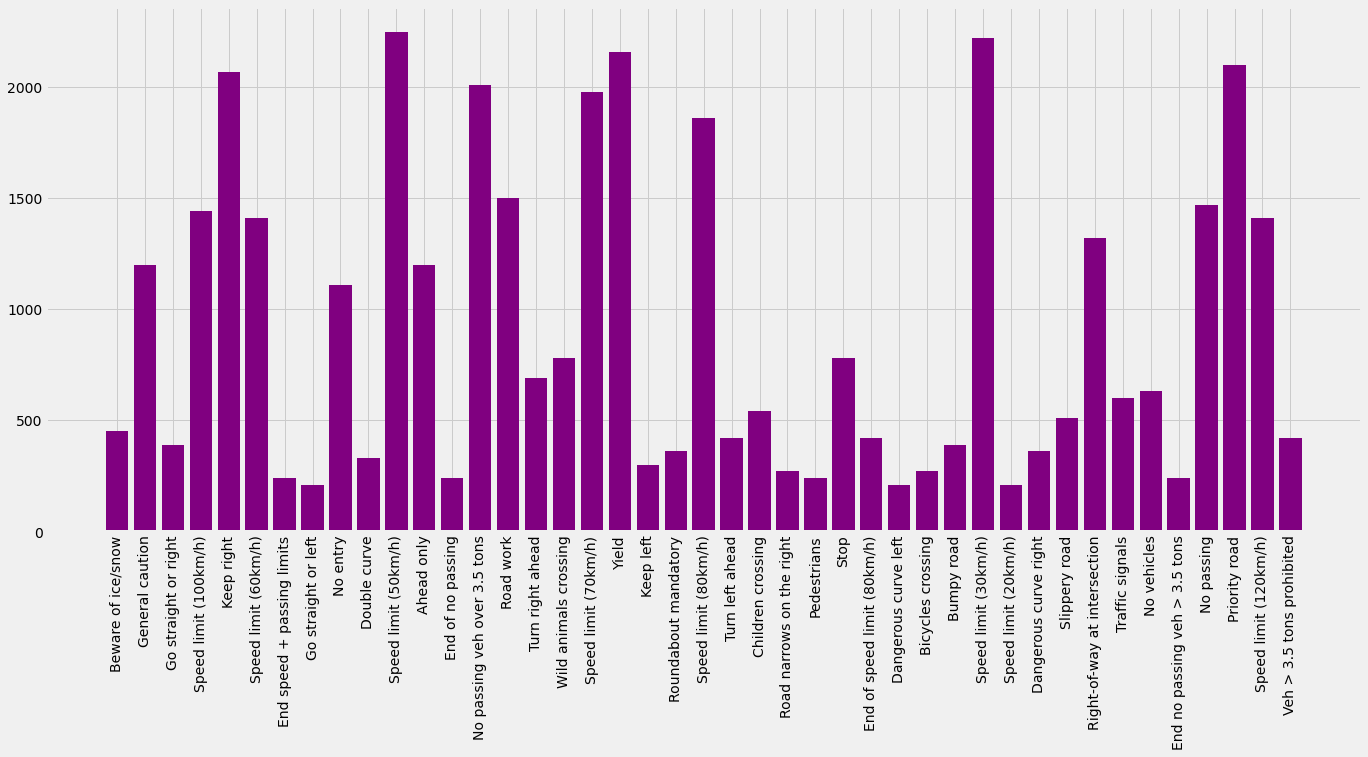

In [ ]:
# Visualizing the class distribution in training data

folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Plotting the number of images in each class
plt.figure(figsize=(21,9))  
plt.bar(class_num, train_number, color='purple')
plt.xticks(class_num, rotation='vertical')
plt.show()

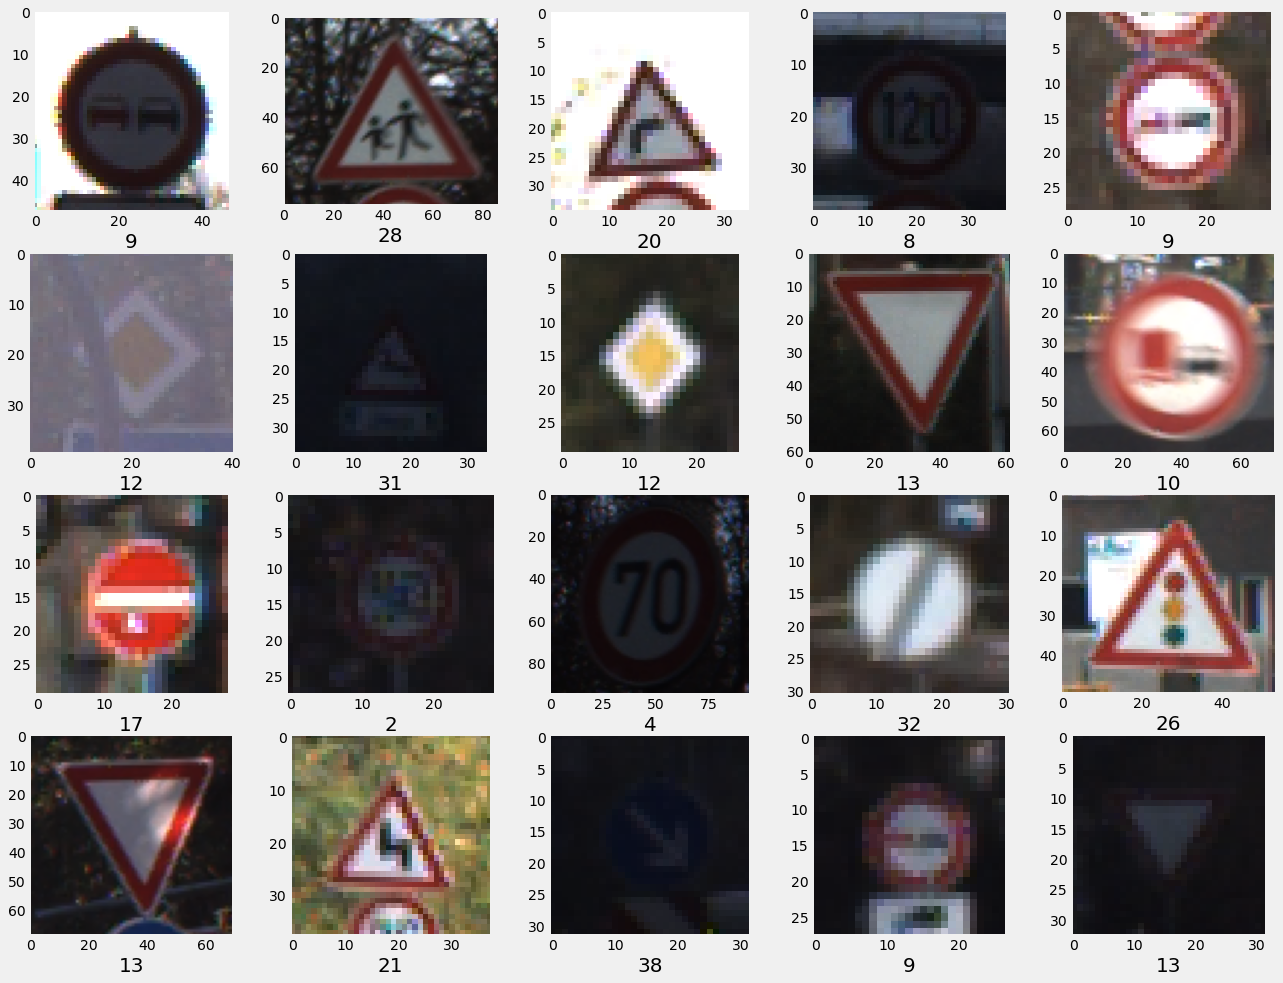

In [ ]:
# Visualizing 20 random images from test data with their corresponding labels

import random
from matplotlib.image import imread

test= pd.read_csv('Test.csv')

plt.figure(figsize=(20,20))

for i in range(1,21):
    plt.subplot(5,5,i)
    index=  random.choice( test.index )
    random_img_path = test["Path"][index]
    rand_img= imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(test["ClassId"][index], fontsize = 20, color='black')

## Collecting  Training Data

In [ ]:
image_data_train = []
image_labels_train = []

for i in range(NUM_CATEGORIES):
    path ='Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data_train.append(np.array(resize_image))
            image_labels_train.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data_train = np.array(image_data_train)
image_labels_train = np.array(image_labels_train)

print(image_data_train.shape, image_labels_train.shape)

(39209, 30, 30, 3) (39209,)


## Collecting Testing Data

In [ ]:
image_data_test = []
image_labels_test = []

for ind in test.index:
    path= str(test['Path'][ind])
    image= cv2.imread(path)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
    image_data_test.append(np.array(resize_image))
    image_labels_test.append(int(test['ClassId'][ind]))
        
# Changing the list to numpy array
image_data_test = np.array(image_data_test)
image_labels_test = np.array(image_labels_test)

print(image_data_test.shape, image_labels_test.shape)

(12630, 30, 30, 3) (12630,)


## Shuffling the training and testing data

In [ ]:
shuffle_indexes = np.arange(image_data_train.shape[0])
np.random.shuffle(shuffle_indexes)
image_data_train = image_data_train[shuffle_indexes]
image_labels_train = image_labels_train[shuffle_indexes]

In [ ]:
shuffle_indexes = np.arange(image_data_test.shape[0])
np.random.shuffle(shuffle_indexes)
image_data_test= image_data_test[shuffle_indexes]
image_labels_test = image_labels_test[shuffle_indexes]

## Normalizing all the pixels of labelled images

In [ ]:
image_data_train= image_data_train/255
image_data_test= image_data_test/255

## Splitting the data into training and validation set

In [ ]:
X_train, X_val, y_train, y_val = image_data_train, image_data_test, image_labels_train, image_labels_test


print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (39209, 30, 30, 3)
X_valid.shape (12630, 30, 30, 3)
y_train.shape (39209,)
y_valid.shape (12630,)


## One hot encoding the labels

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(39209, 43)
(12630, 43)


## Making the model

In [ ]:
model = models.Sequential() #Sequential Model

#ConvLayer(512 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(512,kernel_size=3,activation='relu',padding='same',input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(264 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(264,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#1 Dense layers with 4096 hidden units
model.add(layers.Dense(4096,activation='relu'))

#2 Dense layers with 8192 hidden units
model.add(layers.Dense(8192,activation='relu'))

#3 Dense layers with 1024 hidden units
model.add(layers.Dense(1024,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 512)       14336     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 512)      0         
 g2D)                                                            
                                                                 
 batch_normalization_13 (Bat  (None, 15, 15, 512)      2048      
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 15, 15, 512)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 15, 264)       1216776   
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 264)       

In [ ]:
opt= Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Augmenting the data and training the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=128, validation_data=(X_val, y_val), callbacks=callback)

Epoch 1/128
1226/1226 [==============================] - 42s 33ms/step - loss: 1.6549 - accuracy: 0.5067 - val_loss: 0.6367 - val_accuracy: 0.7915
Epoch 2/128
1226/1226 [==============================] - 40s 33ms/step - loss: 0.4467 - accuracy: 0.8573 - val_loss: 0.2953 - val_accuracy: 0.9173
Epoch 3/128
1226/1226 [==============================] - 40s 33ms/step - loss: 0.2874 - accuracy: 0.9154 - val_loss: 0.2902 - val_accuracy: 0.9226
Epoch 4/128
1226/1226 [==============================] - 40s 33ms/step - loss: 0.2088 - accuracy: 0.9386 - val_loss: 0.2513 - val_accuracy: 0.9330
Epoch 5/128
1226/1226 [==============================] - 40s 32ms/step - loss: 0.1884 - accuracy: 0.9477 - val_loss: 0.2379 - val_accuracy: 0.9397
Epoch 6/128
1226/1226 [==============================] - 40s 33ms/step - loss: 0.2141 - accuracy: 0.9420 - val_loss: 0.1847 - val_accuracy: 0.9532
Epoch 7/128
1226/1226 [==============================] - 40s 33ms/step - loss: 0.1547 - accuracy: 0.9579 - val_loss: 0

In [ ]:
model.save("model.h5")

## Evaluating the model

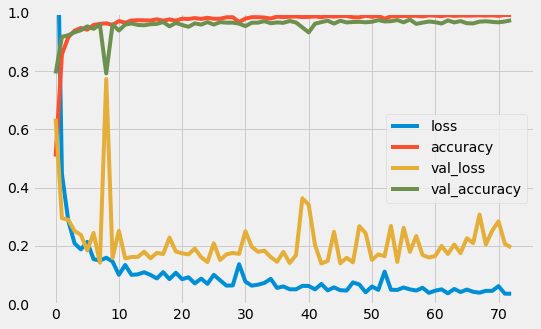

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Visualizing the confusion matrix

In [ ]:
Y_test = np.argmax(y_val, axis=1)

Y_pred= model.predict(X_val)

Y_pred= np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

395/395 [==============================] - 2s 6ms/step
-Acuracy achieved: 97.42%
-Accuracy by model was: 99.19%
-Accuracy by validation was: 97.42%


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, Y_pred)

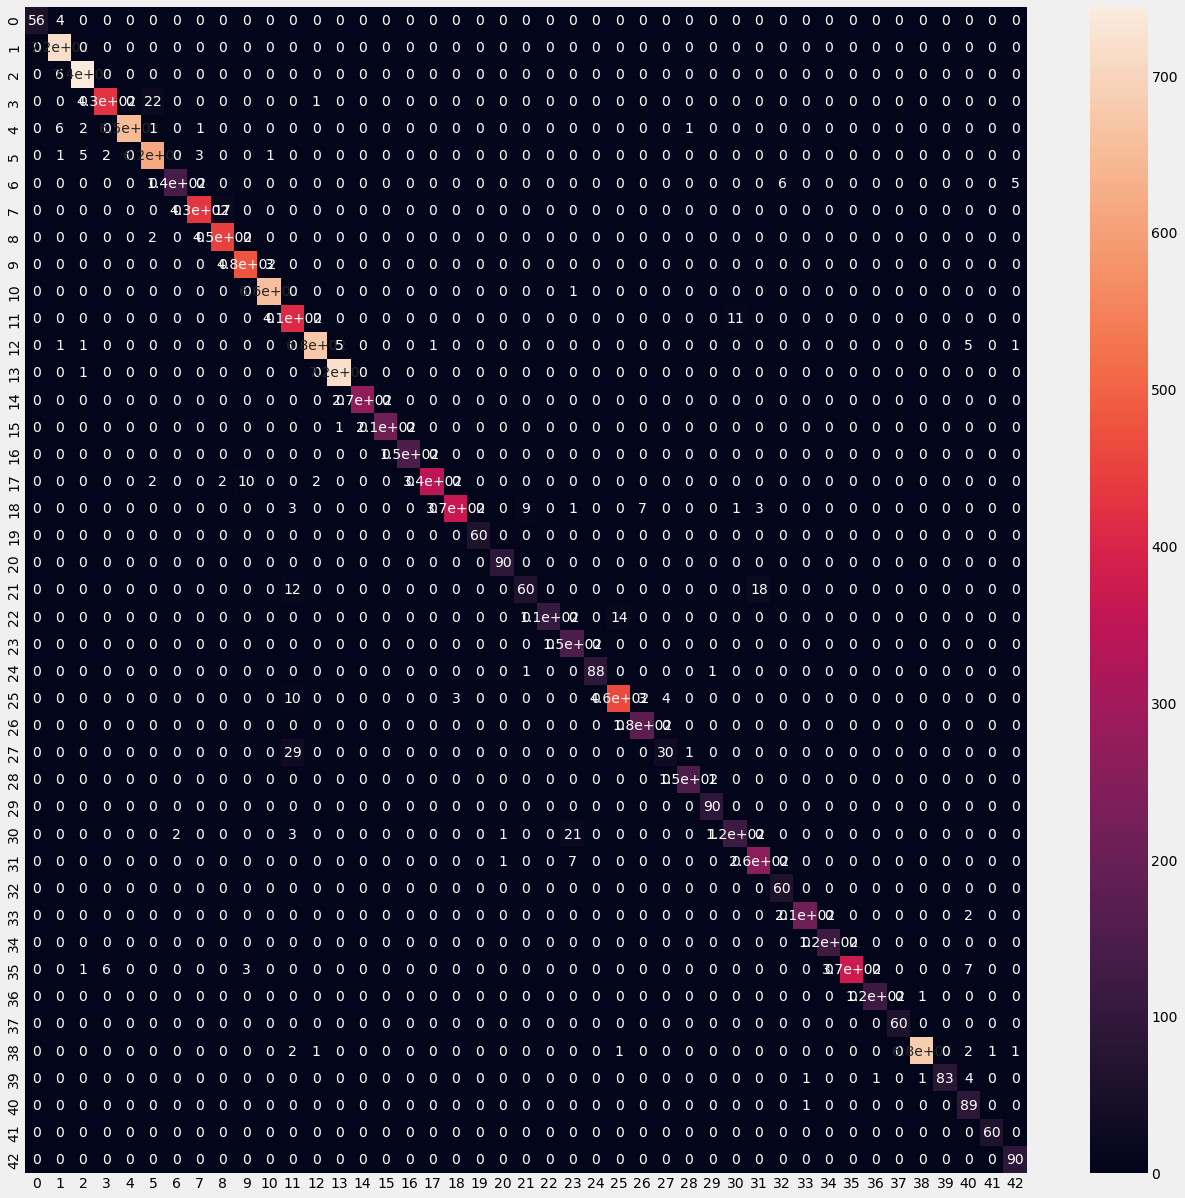

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.98      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.98      0.95      0.96       450
           4       1.00      0.98      0.99       660
           5       0.96      0.98      0.97       630
           6       0.99      0.93      0.96       150
           7       0.99      0.96      0.98       450
           8       0.96      1.00      0.98       450
           9       0.97      0.99      0.98       480
          10       0.99      1.00      1.00       660
          11       0.87      0.97      0.92       420
          12       0.99      0.98      0.99       690
          13       0.99      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

## Predictions on Random Test Data

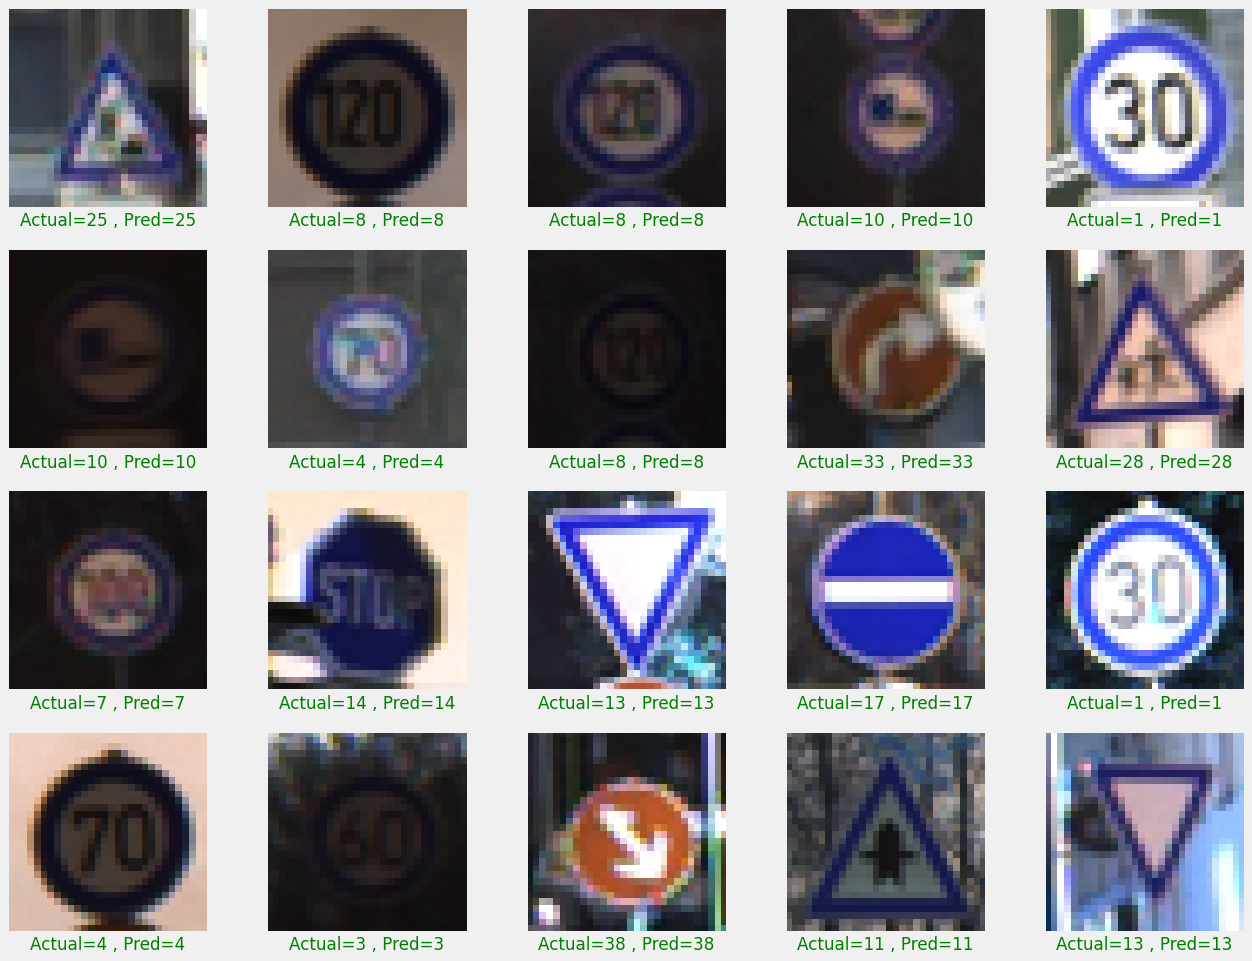

In [ ]:
plt.figure(figsize = (20, 20))

start_index = 0
for n in range(20):
    i=  random.choice( test.index )
    start_index= start_index+ 1

    plt.subplot(5, 5, start_index)

    plt.grid(False)

    plt.xticks([])
    plt.yticks([])
    
    prediction = Y_pred[i]
    actual = Y_test[i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} , Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_val[i])
plt.show()